In [ ]:
#perceptron de dos capas
#dos clases, entoncex entran 2 variables, y salen una variable, que puede valer 2 valores distintos
#Si variables input, So variables output
#las Sh son las var de la capas ocultas, si hay mucha neurona overfitea, si hay poca, subfitea
#entocnes, es l modelo/asquitectura, es fundamental para no sub, o sobre fittear

#la unidad unbral es el fmaoso bias, que es la columna de unos que usamos hasta ahora

#dim de los w...

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

#vamos a ir guardando las matrices de los resultados de  cada capa

#y0 dim(p,si+1)
#yh dim(p,sh+1)
#yo dim(p,so)

'\ndim de los pesos\npara w1 dim(Si+1,Sh)\nw2 dim(Sh+1,So)\n'

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

P = 100#patrones

Si = 2#dim de entradas

Sh = 3#dim capa oculta

So = 1#dim output

x = np.random.uniform(-5,5,(P,Si))

z = np.sign(np.prod(x, axis=1).reshape((P,So)))#la clasificacion al azar

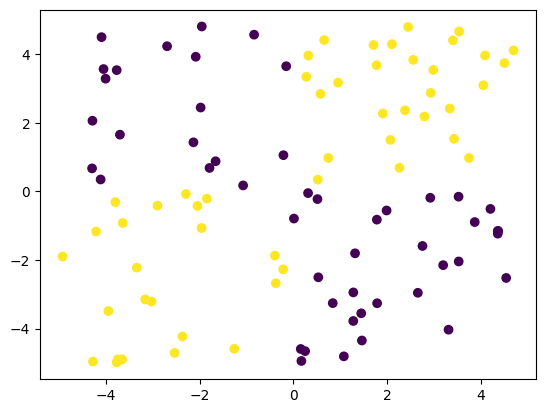

In [ ]:
plt.scatter(x[:,0] , x[:,1] , c = z.flatten())

In [ ]:
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

In [ ]:
def bias_add(V):

  bias = np.ones((len(V) , 1))

  return(np.hstack([V,bias]))

def bias_sub(V):

  return(V[:,:-1])

SyntaxError: ignored

In [ ]:
"""
delta_w2 = lr * npdot(y1.T , D2)
con D2= E2*dY2(mult elem a elem) , con E2 z-Y2
con dY2 la derivada de Y2

luego

delta_w1 = lr * np.dot(y0.T , D1) con

D1 = E1*dY1 (mult elem a elem) , donde E1 = np.dot(E2 , W2.T)
dY1 es l derivada de Y1
"""

'\ndelta_w2 = lr * npdot(y1.T , D2)\ncon D2= E2*dY2(mult elem a elem) , con E2 z-Y2\ncon dY2 la derivada de Y2\n\nluego\n\ndelta_w1 = lr * np.dot(y0.T , D1) con\n\nD1 = E1*dY1 (mult elem a elem) , donde E1 = np.dot(E2 , W2.T)\ndY1 es l derivada de Y1\n'

In [ ]:
#les agregos los bias a todas
Y0[:] = bias_add(x)

Y0.shape , W1.shape#le respeta las mismas dim que al inicio

((100, 3), (3, 3))

In [ ]:
Y1 = np.tanh(np.dot(Y0,W1))

In [ ]:
Y1 = bias_add(Y1)#agrego el bias

print(Y1.shape , W2.shape)

Y2[:] = np.tanh(np.dot(Y1 , W2))#para respetarle las dim originales

(100, 4) (4, 1)


In [ ]:
#ahora puedo ver lso errores
E2 = z-Y2

D2 = E2*(1-(Y2*Y2))#la derivada de Y2

delta_W2 = 0.001*np.dot(Y1.T , D2)

In [ ]:
#erro1

E1 = np.dot(D2 , W2.T)

D1 = E1*(1-(Y1*Y1))

delta_W1 = 0.001*np.dot(Y0.T , D1)

In [ ]:
#Bueno,   todos los pasos funcionaros, asi que hagamos el ciclo
epocas = 0

error_2 = 10000

errores_2 = []

while error_2 > 0.001 and epocas < 100000:
###FORWARD
  Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

  Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
  E2 = z-Y2

  D2 = E2*(1-np.square(Y2))#la derivada de Y2

  delta_W2 = 0.01*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
  W2 = W2+delta_W2

  E1 = np.dot(D2 , W2.T)

  D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

  delta_W1 = 0.01*np.dot(Y0.T , D1)

  W1 = W1 + delta_W1
#####GAFICACION####
  error_2 = np.sum(np.square(E2))

  errores_2.append(error_2)

  epocas += 1

  

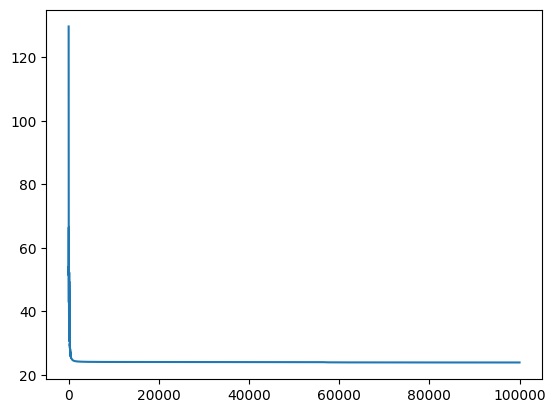

In [ ]:
x_error_2 = np.arange(0,len(errores_2))

plt.plot(x_error_2 , errores_2)

In [ ]:
'''
queda hacer paridad, y lo de las funciones cos_sen
'''

'\nqueda hacer paridad, y lo de las funciones cos_sen\n'

In [ ]:
#paridad... 2 , 4 , 8 , 10 variables
#cada fila es un patron, si la cantidad de 1 es impar en la fila, el target es 1

#probemos realizando permutaciones para el caso de 2 variables
import numpy as np
from itertools import permutations

x_2 = [1,0]

x_2_perm_1 = set(permutations(x_2))#esto devuelve un conjunto de tuplas con todas las permutaciones posibles

print(x_2_perm_1)

{(1, 0), (0, 1)}


In [ ]:
x_4 = [1,0,0,0]

x_4_perm_1 = set(permutations(x_4))

x_8 = [1,0,0,0,0,0,0,0]

x_8_perm_1 = set(permutations(x_8))

x_10 = [1,0,0,0,0,0,0,0,0,0]

x_10_perm_1 = set(permutations(x_10))#resulta obvio que voy a necesitar funcion para ir generando agregados de 1 a la lita original
#y asi tener todas las permutaciones posibles

print(x_4_perm_1 , '\n' , x_8_perm_1 , '\n' , x_10_perm_1)

{(0, 0, 0, 1), (0, 1, 0, 0), (1, 0, 0, 0), (0, 0, 1, 0)} 
 {(0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0), (1, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 1, 0, 0, 0, 0, 0, 0)} 
 {(0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0), (1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 1, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 1, 0, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 0, 0, 0)}


In [ ]:
#funcionar, funciona, voy a rmarar una funcion para generar las permutaciones, con todos los 1 posibles
import numpy as np
from itertools import permutations


def PermutadorBinario(lista_ceros):
  '''
  la lsita solo contiene 0

  devuelve un conjunto con todas las permutaciones posibles, agregando unos, de a uno
  '''
  lista_perm = []

  for i in range(0,len(lista_ceros)):

    lista_ceros[i] = 1

    conj_i = (set(permutations(lista_ceros)))

    lista_perm.append(list(conj_i))

  res = []

  for k in range(0,len(lista_perm)):

    for j in range(0 , len(lista_perm[k])):

      res.append(list(lista_perm[k][j]))

  return(np.array(res).reshape(-1,len(lista_ceros)))

In [ ]:
list((0,8,5))

[0, 8, 5]

In [ ]:
PermutadorBinario([0,0,0])

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 1],
       [1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [ ]:
#ahora tambien me interesa tener una funcion para definir si es par o impar, y asi asignar el valor de paridad
#ya que el target da 1 si y solo si es impar el num de 1

def Paridad(funcion, lista):
  
    arr = funcion(lista)

    target = np.zeros((arr.shape[0],1))

    for fila in range(0,arr.shape[0]):

        if((np.sum((arr[fila,:]))%2) == 0):
     # print(arr[fila,:])
            target[fila,0] = 0

        else:

            target[fila,0] = 1
    #print(arr[fila,:])
    return target

In [ ]:
print(PermutadorBinario([0,0,0]))

[[1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 1]
 [1 1 0]
 [0 1 1]
 [1 1 1]]


In [ ]:
Paridad(PermutadorBinario,[0,0,0])

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

Listo el pollo, tengo todas las funciones necesarias, vamo a entrenar las redes...

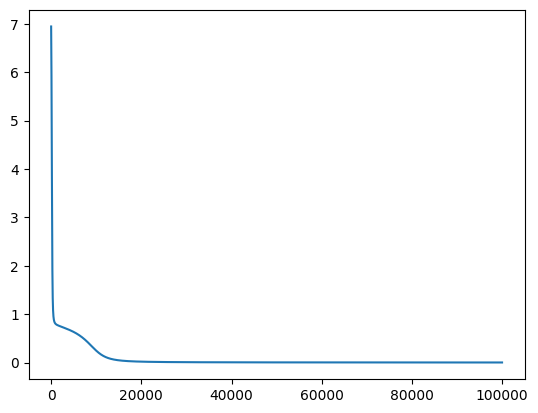

In [ ]:
#Paridad, vamos a entrenar las redes de 2 variables, 4 , 8 , y 10

import numpy as np

from matplotlib import pyplot as plt

P = PermutadorBinario([0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 3#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_2 = 10000

errores_2 = []

lr = 0.001

while error_2 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_2 = np.sum(np.square(E2))

    errores_2.append(error_2)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_2))

plt.plot(x_graf , errores_2)

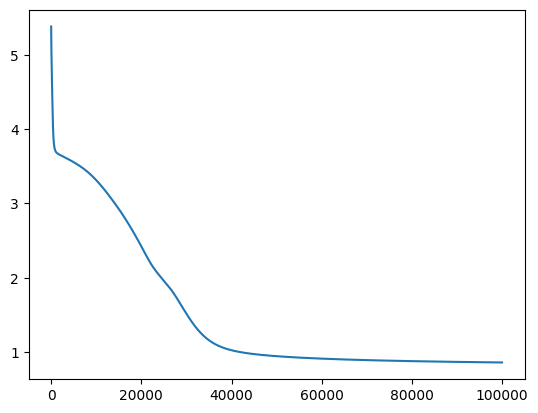

In [ ]:
#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 3#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_4 = 10000

errores_4 = []

lr = 0.001

while error_4 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_4 = np.sum(np.square(E2))

    errores_4.append(error_4)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_4))

plt.plot(x_graf , errores_4)

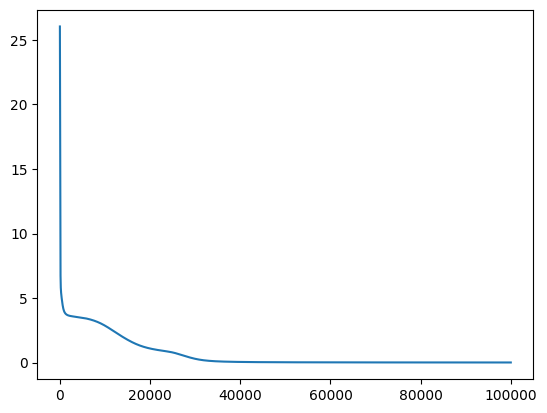

In [ ]:
#Paridad para 4 variables, le sumo dos neuronas a la capa oculta

P = PermutadorBinario([0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 5#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_4 = 10000

errores_4 = []

lr = 0.001

while error_4 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_4 = np.sum(np.square(E2))

    errores_4.append(error_4)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_4))

plt.plot(x_graf , errores_4)

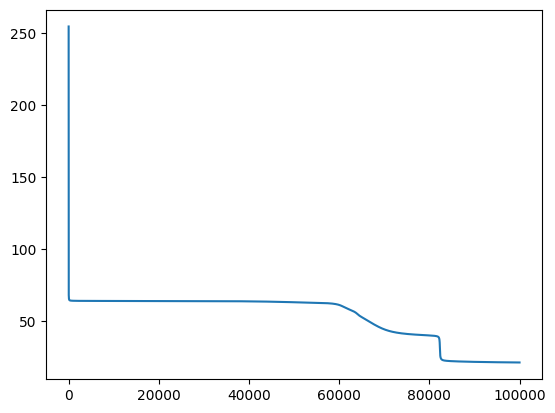

In [ ]:
#para 8 variables

#Paridad para 8 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 3#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_8 = 10000

errores_8 = []

lr = 0.001

while error_8 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_8 = np.sum(np.square(E2))

    errores_8.append(error_8)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_8))

plt.plot(x_graf , errores_8)

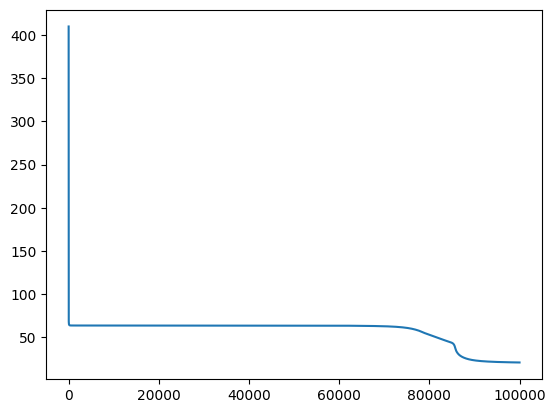

In [ ]:
#para 8 variables, 5 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 5#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_8 = 10000

errores_8 = []

lr = 0.001

while error_8 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_8 = np.sum(np.square(E2))

    errores_8.append(error_8)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_8))

plt.plot(x_graf , errores_8)

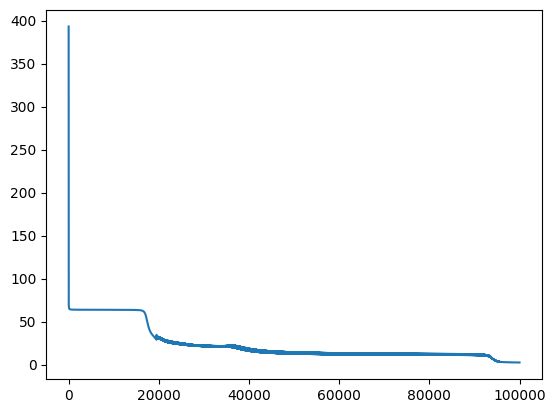

In [ ]:
#para 8 variables, 7 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 7#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_8 = 10000

errores_8 = []

lr = 0.001

while error_8 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_8 = np.sum(np.square(E2))

    errores_8.append(error_8)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_8))

plt.plot(x_graf , errores_8)

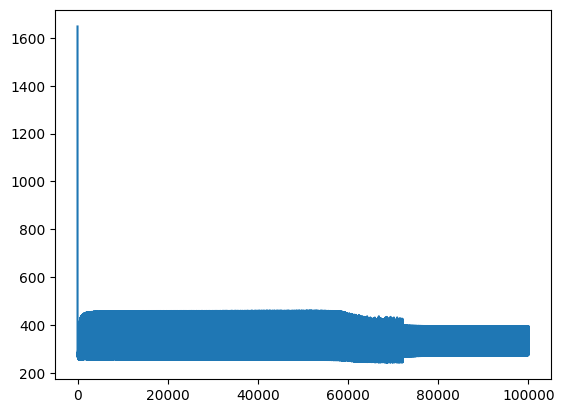

In [ ]:
#para 10 variables

#para 8 variables, 5 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 5#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_10 = 10000

errores_10 = []

lr = 0.001

while error_10 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_10 = np.sum(np.square(E2))

    errores_10.append(error_10)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_10))

plt.plot(x_graf , errores_10)

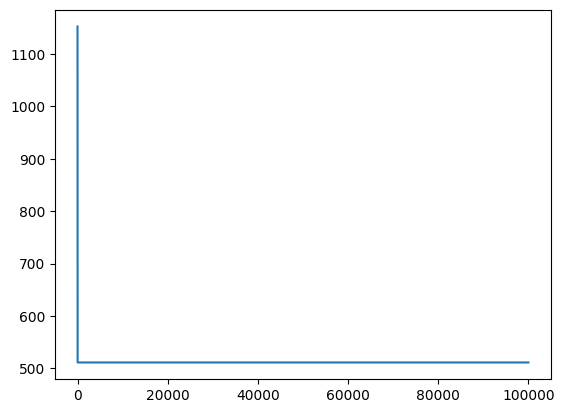

In [ ]:
#para 10 variables

#para 8 variables, 5 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 7#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_10 = 10000

errores_10 = []

lr = 0.01

while error_10 > 0.001 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_10 = np.sum(np.square(E2))

    errores_10.append(error_10)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_10))

plt.plot(x_graf , errores_10)

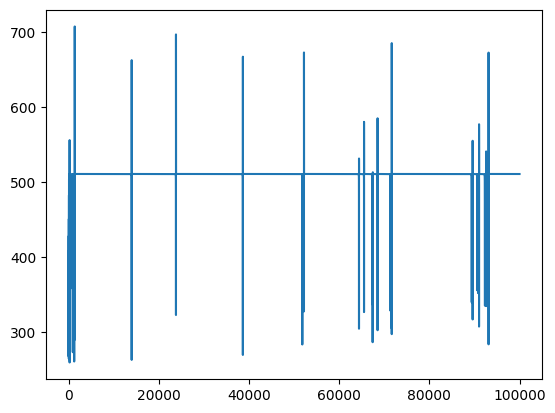

In [ ]:
#para 10 variables, 12 neuronas

P = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 12#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_10 = 10000

errores_10 = []

lr = 0.001

while error_10 > 0.01 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_10 = np.sum(np.square(E2))

    errores_10.append(error_10)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_10))

plt.plot(x_graf , errores_10)

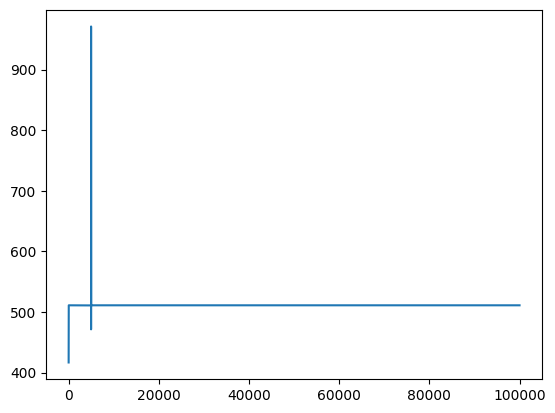

In [ ]:
#para 10 variables

#para 8 variables, 5 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 6#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_10 = 10000

errores_10 = []

lr = 0.01

while error_10 > 0.01 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_10 = np.sum(np.square(E2))

    errores_10.append(error_10)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_10))

plt.plot(x_graf , errores_10)

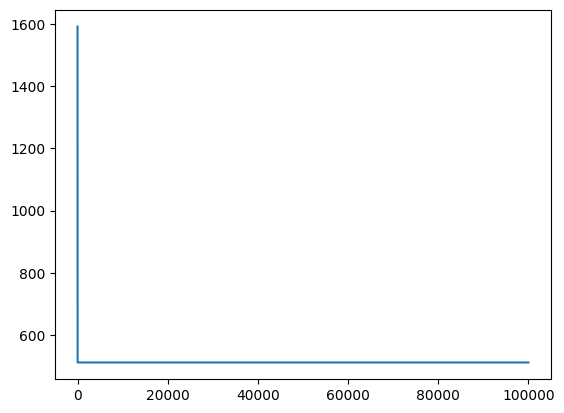

In [ ]:
#para 10 variables

#para 8 variables, 5 neuronas capa oculta

#Paridad para 4 variables

P = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[0]#patrones, filas del input

Si = PermutadorBinario([0,0,0,0,0,0,0,0,0,0]).shape[1]#dim de entradas, num de variables, o sea, columnas de entrada

Sh = 4#dim capa oculta(entiendo que seria el num de neuronas en esta capa), filas de peso1, col de peso2

So = 1#dim output

x = PermutadorBinario([0,0,0,0,0,0,0,0,0,0])#el input, sin bias

z = Paridad(PermutadorBinario,[0,0,0,0,0,0,0,0,0,0])#la clasificacion , el target

#las funciones de salida
Y0 = np.zeros((P,Si+1))
Y1 = np.zeros((P,Sh+1))
Y2 = np.zeros((P,So))

#los pesos

"""
dim de los pesos
para w1 dim(Si+1,Sh)
w2 dim(Sh+1,So)
"""

W1 = np.random.normal(0 , 0.5 , (Si+1,Sh))

W2 = np.random.normal(0 , 0.5 , (Sh+1,So))

#el entrenamiento de la red

epocas = 0

error_10 = 10000

errores_10 = []

lr = 0.01

while error_10 > 0.01 and epocas < 100000:
###FORWARD
    Y0[:] = bias_add(x)

    Y1[:] = bias_add(np.tanh(np.dot(Y0,W1)))

    Y2[:] = (np.tanh(np.dot(Y1 , W2)))
#######BACK#######
    E2 = z-Y2

    D2 = E2*(1-np.square(Y2))#la derivada de Y2

    delta_W2 = lr*np.dot(Y1.T , D2)
####ACTUAÑIZO PESOS######
    W2 = W2+delta_W2

    E1 = np.dot(D2 , W2.T)

    D1 = bias_sub(E1*(1-np.square(Y1)))#saco la dimencion del umbral, el bias, ya que para retropropagar no hace falta, para le prod elemento a elemento

    delta_W1 = lr*np.dot(Y0.T , D1)

    W1 = W1 + delta_W1
#####ParaGAFICACION####
    error_10 = np.sum(np.square(E2))

    errores_10.append(error_10)

    epocas += 1

#Graficacion

x_graf = np.arange(0 , len(errores_10))

plt.plot(x_graf , errores_10)

In [ ]:
import numpy as np
p = np.arange(-3 , 4)
permu = np.random.permutation(p)

for i in permu:

    print(i)

print(f'lo que quiero permutar es: {p} , p permutado es: {permu}')

-2
0
-3
3
2
1
-1
lo que quiero permutar es: [-3 -2 -1  0  1  2  3] , p permutado es: [-2  0 -3  3  2  1 -1]


Aca esta el stochastic gradient descendent incremental,se puede generalizar usando un entero para el tamanio de h, siendo 1 incremental, x.shape[0] para lote completo, u otro entero, para minibatch

In [ ]:
#esto tardaba demasiado, y creo que jamas convergia, lo resuelvo en la siguiente celda???
'''
ahora vale la pena empezar a escribir los metodos de incremental, gradiente decendiente estocastico, y mini batch,
'''
###reescribo los paramentros de la red

import numpy as np
from matplotlib import pyplot as plt
P = 100
Si = 2
Sh = 3
So = 1

print('var in: ' , Si , 'neuronas capa oculta: ' , Sh , 'var out: ' , So)

x = np.random.uniform( -5, 5, (P,Si) )
z = np.sign( np.prod( x, axis=1).reshape( (P,So) ) )

W1 = np.random.normal( 0, 0.5, (Si+1, Sh))
W2 = np.random.normal( 0, 0.5, (Sh+1, So))

#arranco con stochastic gradient descendent, incremental

#las outfunctions originales eran

Y0 = np.zeros( (P,Si+1) )
Y1 = np.zeros( (P,Sh+1) )
Y2 = np.zeros( (P,So) )

print('dim Y0: ',Y0.shape ,'dim Y1: ' , Y1.shape , 'dim Y2: ',Y2.shape)
#primero redimenciono las out functions que van dentro del for

Y0h = np.zeros( (1,Si+1) )
Y1h = np.zeros( (1,Sh+1) )
Y2h = np.zeros( (1,So) )

print('dim Y0h: ',Y0h.shape , 'dim Y1h: ',Y1h.shape , 'dim Y2h: ',Y2h.shape)

    #lo hago con la derivada de tanh, pues paja...
error = 1000
stochastic = np.random.permutation(P)

errores = []

lr = 0.001


for h in range(0 , len(stochastic)):
    Y0h[:] = Y0[h,:]
    Zh[:] = z[h,:]
     

    while (error > 0.01):#si entiendo bien la idea, la gracia es que cada iteracion del for entrene y corrija la red, independientemnte
    #forward
        Y0[:] = bias_add(x)#esto es para arreglar un problema con correr a bias add sobre una sola fila(dim no iguales)
        Y0h[:] = (Y0[h,:])
        Y1h[:] = bias_add( np.tanh( np.dot( Y0h, W1)))
        Y2h[:] = np.tanh( np.dot( Y1h, W2))

        dY2 = 1-np.square(Y2h)#deivada de tanh

        E2 = Zh-Y2h
        dY2 = 1-np.square(Y2h)
        D2 = E2*dY2

        dW2 = np.dot( Y1h.T, D2)

        E1 = np.dot( D2, W2.T)
        dY1 = 1-np.square(Y1h)
        D1 = bias_sub( E1*dY1)

        dW1 = np.dot( Y0h.T, D1)

        W1 += lr * dW1
        W2 += lr * dW2

        errores = np.mean( np.square( E2))

plt.plot(np.arange(0,len(errores)), errores)

var in:  2 neuronas capa oculta:  3 var out:  1
dim Y0:  (100, 3) dim Y1:  (100, 4) dim Y2:  (100, 1)
dim Y0h:  (1, 3) dim Y1h:  (1, 4) dim Y2h:  (1, 1)


KeyboardInterrupt: ignored

In [ ]:
#otra implementacion, que creo que resuelve el problema

'''
ahora vale la pena empezar a escribir los metodos de incremental, gradiente decendiente estocastico, y mini batch,
'''
###reescribo los paramentros de la red

import numpy as np
from matplotlib import pyplot as plt
P = 100
Si = 2
Sh = 3
So = 1

print('var in: ' , Si , 'neuronas capa oculta: ' , Sh , 'var out: ' , So)

x = np.random.uniform( -5, 5, (P,Si) )
z = np.sign( np.prod( x, axis=1).reshape( (P,So) ) )

W1 = np.random.normal( 0, 0.5, (Si+1, Sh))
W2 = np.random.normal( 0, 0.5, (Sh+1, So))

#arranco con stochastic gradient descendent, incremental

#las outfunctions originales eran

Y0 = np.zeros( (P,Si+1) )
Y1 = np.zeros( (P,Sh+1) )
Y2 = np.zeros( (P,So) )

print('dim Y0: ',Y0.shape ,'dim Y1: ' , Y1.shape , 'dim Y2: ',Y2.shape)
#primero redimenciono las out functions que van dentro del for

Y0h = np.zeros( (1,Si+1) )
Y1h = np.zeros( (1,Sh+1) )
Y2h = np.zeros( (1,So) )

print('dim Y0h: ',Y0h.shape , 'dim Y1h: ',Y1h.shape , 'dim Y2h: ',Y2h.shape)

    #lo hago con la derivada de tanh, pues paja...
error = 1000
stochastic = np.random.permutation(P)

errores = []

lr = 0.001

Y0[:] = bias_add(x)#esto es para arreglar un problema con correr a bias add sobre una sola fila(dim no iguales)


for h in range(0 , len(stochastic)):
    Y0h[:] = Y0[h,:]
    Zh[:] = z[h,:]
     

    while (error > 0.01):#si entiendo bien la idea, la gracia es que cada iteracion del for entrene y corrija la red, independientemnte
    #forward
        
        Y0h[:] = (Y0[h,:])
        Y1h[:] = bias_add( np.tanh( np.dot( Y0h, W1)))
        Y2h[:] = np.tanh( np.dot( Y1h, W2))

        dY2 = 1-np.square(Y2h)#deivada de tanh

        E2 = Zh-Y2h
        dY2 = 1-np.square(Y2h)
        D2 = E2*dY2

        dW2 = np.dot( Y1h.T, D2)

        E1 = np.dot( D2, W2.T)
        dY1 = 1-np.square(Y1h)
        D1 = bias_sub( E1*dY1)

        dW1 = np.dot( Y0h.T, D1)

        W1 += lr * dW1
        W2 += lr * dW2

        errores = np.mean( np.square( E2))

plt.plot(np.arange(0,len(errores)), errores)

var in:  2 neuronas capa oculta:  3 var out:  1
dim Y0:  (100, 3) dim Y1:  (100, 4) dim Y2:  (100, 1)
dim Y0h:  (1, 3) dim Y1h:  (1, 4) dim Y2h:  (1, 1)


KeyboardInterrupt: ignored

Esta arreglado, arregladisimo!!!!  perfectirigillo amiguillo

Se han truncado las últimas 5000 líneas del flujo de salida.
0.07511736410881135
0.07503242769919403
0.07494766846018439
0.07486308586243993
0.07477867937865765
0.07469444848356487
0.07461039265390931
0.07452651136844989
0.07444280410794726
0.07435927035515415
0.07427590959480691
0.07419272131361512
0.07410970500025331
0.07402686014535137
0.07394418624148523
0.07386168278316871
0.07377934926684353
0.07369718519087069
0.0736151900555219
0.0735333633629703
0.07345170461728166
0.07337021332440617
0.07328888899216887
0.07320773113026167
0.07312673925023443
0.07304591286548642
0.07296525149125807
0.07288475464462182
0.07280442184447461
0.07272425261152843
0.07264424646830299
0.07256440293911703
0.07248472155007939
0.07240520182908237
0.07232584330579178
0.07224664551164008
0.07216760797981782
0.07208873024526564
0.0720100118446664
0.07193145231643677
0.07185305120072041
0.07177480803937858
0.07169672237598382
0.07161879375581096
0.0715410217258303
0.07146340583469932
0.0713859456327552
0.07

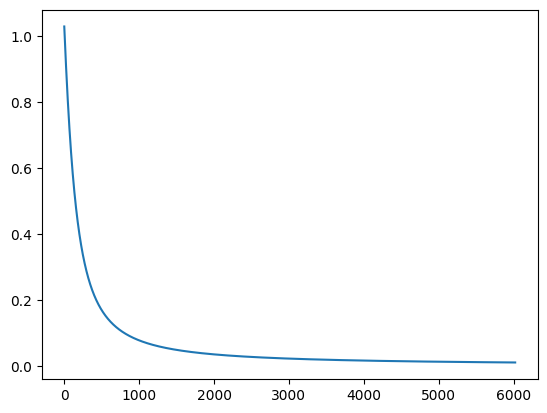

In [ ]:
###creo que ya se cual es el problema...veamos

#otra implementacion, que creo que resuelve el problema

'''
ahora vale la pena empezar a escribir los metodos de incremental, gradiente decendiente estocastico, y mini batch,
'''
###reescribo los paramentros de la red

import numpy as np
from matplotlib import pyplot as plt
P = 100
Si = 2
Sh = 3
So = 1

#print('var in: ' , Si , 'neuronas capa oculta: ' , Sh , 'var out: ' , So)

x = np.random.uniform( -5, 5, (P,Si) )
z = np.sign( np.prod( x, axis=1).reshape( (P,So) ) )

W1 = np.random.normal( 0, 0.5, (Si+1, Sh))
W2 = np.random.normal( 0, 0.5, (Sh+1, So))

#arranco con stochastic gradient descendent, incremental

#las outfunctions originales eran

Y0 = np.zeros( (P,Si+1) )
Y1 = np.zeros( (P,Sh+1) )
Y2 = np.zeros( (P,So) )

#print('dim Y0: ',Y0.shape ,'dim Y1: ' , Y1.shape , 'dim Y2: ',Y2.shape)
#primero redimenciono las out functions que van dentro del for

Y0h = np.zeros( (1,Si+1) )
Y1h = np.zeros( (1,Sh+1) )
Y2h = np.zeros( (1,So) )

#print('dim Y0h: ',Y0h.shape , 'dim Y1h: ',Y1h.shape , 'dim Y2h: ',Y2h.shape)

    #lo hago con la derivada de tanh, pues paja...
error = 1000
stochastic = np.random.permutation(P)

errores = []

lr = 0.001

Y0[:] = bias_add(x)#esto es para arreglar un problema con correr a bias add sobre una sola fila(dim no iguales)


for h in stochastic:
    Y0h[:] = Y0[h,:]
    Zh[:] = z[h,:]
     

    while (error > 0.01):#si entiendo bien la idea, la gracia es que cada iteracion del for entrene y corrija la red, independientemnte
    #forward
        
        Y0h[:] = (Y0[h,:])
        Y1h[:] = bias_add( np.tanh( np.dot( Y0h, W1)))
        Y2h[:] = np.tanh( np.dot( Y1h, W2))

        dY2 = 1-np.square(Y2h)#deivada de tanh

        E2 = Zh-Y2h
        dY2 = 1-np.square(Y2h)
        D2 = E2*dY2

        dW2 = np.dot( Y1h.T, D2)

        E1 = np.dot( D2, W2.T)
        dY1 = 1-np.square(Y1h)
        D1 = bias_sub( E1*dY1)

        dW1 = np.dot( Y0h.T, D1)

        W1 += lr * dW1
        W2 += lr * dW2

        error = np.mean( np.square( E2))

        errores.append(error)

        #print(errores[-1])

plt.plot(np.arange(0,len(errores)), errores)

In [ ]:
#ahora lo llevo al mundo de batches

'''
de aca aprendo, que para generalizarlo del todo, habria que usar como parametro un solo entero que sea tamanio del batch

si B = 1 => incremental

si B = P => lote

si B > 1 & B < P => mini batch
'''

'''
ahora vale la pena empezar a escribir los metodos de incremental, gradiente decendiente estocastico, y mini batch,
'''
###reescribo los paramentros de la red

import numpy as np
from matplotlib import pyplot as plt
P = 100
Si = 2
Sh = 3
So = 1

#print('var in: ' , Si , 'neuronas capa oculta: ' , Sh , 'var out: ' , So)

x = np.random.uniform( -5, 5, (P,Si) )
z = np.sign( np.prod( x, axis=1).reshape( (P,So) ) )

W1 = np.random.normal( 0, 0.5, (Si+1, Sh))
W2 = np.random.normal( 0, 0.5, (Sh+1, So))

#arranco con stochastic gradient descendent, incremental

#las outfunctions originales eran

Y0 = np.zeros( (P,Si+1) )
Y1 = np.zeros( (P,Sh+1) )
Y2 = np.zeros( (P,So) )

#print('dim Y0: ',Y0.shape ,'dim Y1: ' , Y1.shape , 'dim Y2: ',Y2.shape)
#primero redimenciono las out functions que van dentro del for
B = 15

Y0h = np.zeros( (B,Si+1) )
Y1h = np.zeros( (B,Sh+1) )
Y2h = np.zeros( (B,So) )

print('dim Y0h: ',Y0h.shape , 'dim Y1h: ',Y1h.shape , 'dim Y2h: ',Y2h.shape)

    #lo hago con la derivada de tanh, pues paja...
error = 1000
stochastic = np.random.permutation(P)

errores = []

lr = 0.001

Y0[:] = bias_add(x)#esto es para arreglar un problema con correr a bias add sobre una sola fila(dim no iguales)

#B = 15#es el tamanio del batch

for h in range(0 , P , B):#la diferencia radica aca, lo vamos a generalizar para dado un h, sumarle B filas

    if(min(h+B , P) == h+B):

        batch = stochastic[ h:h+B ]

    if(min(h+B , P) == P):

        batch = stochastic[h:]

    Y0h = Y0[batch,:]
    Zh = z[batch]
     

    while (error > 0.01):#si entiendo bien la idea, la gracia es que cada iteracion del for entrene y corrija la red, independientemnte
    #forward
        
        #Y0h[:] = (Y0[h,:])
        Y1h[:] = bias_add( np.tanh( np.dot( Y0h, W1)))
        Y2h[:] = np.tanh( np.dot( Y1h, W2))

        dY2 = 1-np.square(Y2h)#deivada de tanh

        E2 = Zh-Y2h
        dY2 = 1-np.square(Y2h)
        D2 = E2*dY2

        dW2 = np.dot( Y1h.T, D2)

        E1 = np.dot( D2, W2.T)
        dY1 = 1-np.square(Y1h)
        D1 = bias_sub( E1*dY1)

        dW1 = np.dot( Y0h.T, D1)

        W1 += lr * dW1
        W2 += lr * dW2

        error = np.mean( np.square( E2))

        errores.append(error)

        #print(errores[-1])#se estanca el error muy arriba, y no entiendo por que

plt.plot(np.arange(0,len(errores)), errores)

dim Y0h:  (15, 3) dim Y1h:  (15, 4) dim Y2h:  (15, 1)


NameError: ignored

In [ ]:
import numpy as np
for i in range(0 , 100 , 15):
    if(min(i+15, 100) == i+15):
        print(i)
    if(min(i+15, 100) == 100):
        print(np.arange(i,100))

0
15
30
45
60
75
[90 91 92 93 94 95 96 97 98 99]
